In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Kernelized Support Vector Machines**

- Kernelized SVMs extend the basic support vector machine to hancle non-linear decission boundaries.

- Using "The kernel trick" to map our data into higher-dimensional space. Kernel functions include Linear Kernel, Polynomial Kernel, Radial Basis Function, etc.

- Support vectors as the datapoints that have the most influence on the decision that is made by the model: the ones that lie on the border between the classes.

### **Parametters**

- Choice of the kernel: `kernel`: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'

- Regularization parametter: ``C``; a float the controls complexity. Squared L2 regularization is used.

- Kernel parametters: `gamma` Also controls complexity. It represents the kernel coefficient for rbf, poly and sigmoid. 

In [22]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target,
    random_state=66
)
# SVC whit default parametters
svc = SVC()

svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.90


The model seems to be updated * 

From the textbook, default parametters for SVC where modified, now pre-processing is not needed as it seems to be included now within the model through gamma parametter. **See class description.**

Just for curiosity, lets scale data as the book explain and see what happend.

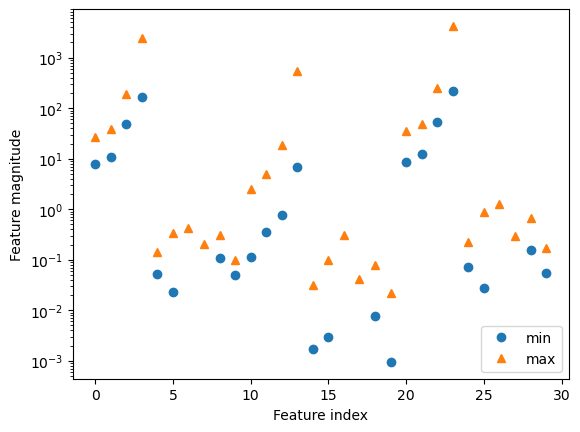

In [7]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [10]:
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
X_test_scaled = (X_test - min_on_training) / range_on_training

How the model performs now with the actual default parametters and training set scaled (MinMax scaling) and coefficient gamam also scaled:

In [12]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.972


Even better! 

Now what if slightly increase regularization?

In [32]:
# C = 10 Seems to be the highest performance
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.979
